# Preparation for ML Models

In [658]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm

from sklearn.metrics import confusion_matrix

Defining all implementation functions.

In [659]:
def prepareData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [660]:
def plotConfusionMatrices(playerBasedConfusionMatrix, teamBasedConfusionMatrix, modelName):
    plt.figure(figsize = (20,6))
    suptitle = "Confusion matrices for " + modelName
    plt.suptitle(suptitle, y=1.05, size=20);

    plt.subplot(1,2,1)
    sns.heatmap(playerBasedConfusionMatrix, annot=True, linewidths=0.5,linecolor="black", fmt='3.0f',cmap="icefire", annot_kws={"fontsize": 20})
    plt.title("Trained with player-based dataset", y=1.05, size=16);

    plt.subplot(1,2,2)
    sns.heatmap(teamBasedConfusionMatrix, annot=True, linewidths=0.5,linecolor="black", fmt='3.0f',cmap="icefire", annot_kws={"fontsize": 20})
    plt.title("Trained with team-based dataset", y=1.05, size=16);
    plt.show()

In [661]:
def calculateModelConfusionMatrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    return confusionMatrix

In [662]:
def calculateMetricsFromConfusionMatrix(confusionMatrix, modelName):
    TP = confusionMatrix[0,0]
    FN = confusionMatrix[0,1]
    FP = confusionMatrix[1,0]
    TN = confusionMatrix[1,1]

    precision = round(TP / (TP + FP), 3)
    recall = round(TP / (TP + FN), 3)
    accuracy = round( (TP + TN) / (TP + TN + FP + FN), 3)
    f1score = round(2 * ((precision * recall) / (precision + recall)), 3)
    precision, recall, accuracy, f1score

    metrics = [{"Precision": precision, "Recall": recall, "Accuracy": accuracy, "F1-score": f1score}]
    metricDataFrame = pd.DataFrame(metrics, index = [modelName])
    
    return metricDataFrame

Creating the global variables

In [663]:
modelsNamesList = ["Logistic Regression", "Naive Bayes Classifier", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "LightGBM"]

playerBasedData = pd.read_csv("cleanDataPlayerBased.csv")
teamBasedData = pd.read_csv("cleanDataTeamBased.csv")

playerBasedData_X=playerBasedData.drop(["win", "id", "individualPosition"], axis=1) #dropping the target attribute and other nonnumeric attributes.
playerBasedData_y=playerBasedData.win.values

teamBasedData_X=teamBasedData.drop(["win", "id", "individualPosition"], axis=1) #dropping the target attribute and other nonnumeric attributes.
teamBasedData_y=teamBasedData.win.values

featuresNamesList = teamBasedData_X.columns

playerBasedDataX_train, playerBasedDataX_test, playerBasedDatay_train, playerBasedDatay_test = prepareData(playerBasedData_X, playerBasedData_y)
teamBasedDataX_train, teamBasedDataX_test, teamBasedDatay_train, teamBasedDatay_test = prepareData(teamBasedData_X, teamBasedData_y)

# Logistic Regression

In [664]:
def LogisticRegressionModel(X_train, y_train):
    logisticRegression = LogisticRegression(random_state = 0)
    logisticRegression.fit(X_train, y_train)
    return logisticRegression

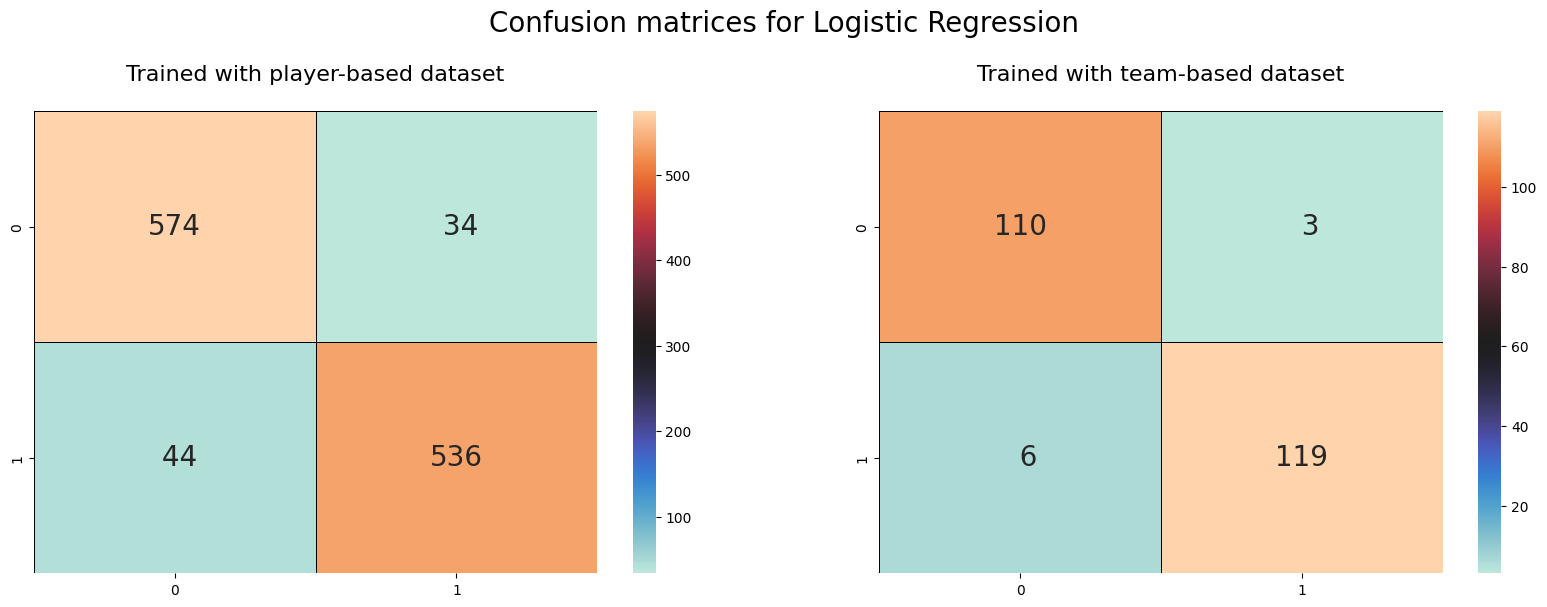

In [665]:
playerBasedLogisticRegressionModel = LogisticRegressionModel(playerBasedDataX_train, playerBasedDatay_train)
playerBasedLogisticRegressionConfusionMatrix = calculateModelConfusionMatrix(playerBasedLogisticRegressionModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedLogisticRegressionModel = LogisticRegressionModel(teamBasedDataX_train, teamBasedDatay_train)
teamBasedLogisticRegressionConfusionMatrix = calculateModelConfusionMatrix(teamBasedLogisticRegressionModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedLogisticRegressionConfusionMatrix, teamBasedLogisticRegressionConfusionMatrix, modelsNamesList[0])

In [666]:
playerBasedLogisticRegressionMetrics = calculateMetricsFromConfusionMatrix(playerBasedLogisticRegressionConfusionMatrix, "Player Based Data")
teamBasedLogisticRegressionMetrics = calculateMetricsFromConfusionMatrix(teamBasedLogisticRegressionConfusionMatrix,"Team Based Data")

logisticRegressionModelMetrics = pd.concat([playerBasedLogisticRegressionMetrics, teamBasedLogisticRegressionMetrics])
logisticRegressionModelMetrics


,Precision,Recall,Accuracy,F1-score
Player Based Data,0.929,0.944,0.934,0.936
Team Based Data,0.948,0.973,0.962,0.960


# Naive Bayes Classifier

In [667]:
def NaiveBayesClassifier(X_train, y_train):
    naiveBayesClassifier = GaussianNB()
    naiveBayesClassifier.fit(X_train, y_train)
    return naiveBayesClassifier

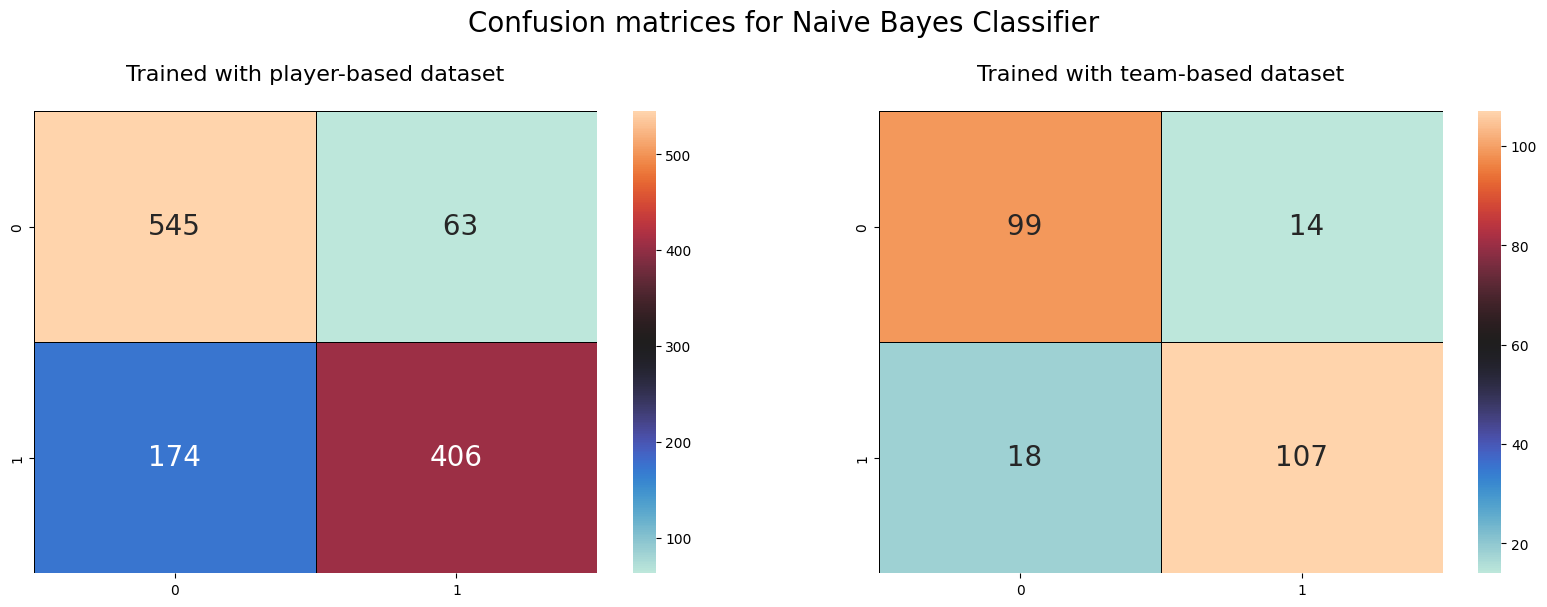

In [668]:
playerBasedNaiveBayesClassifierModel = NaiveBayesClassifier(playerBasedDataX_train, playerBasedDatay_train)
playerBasedNaiveBayesClassifierConfusionMatrix = calculateModelConfusionMatrix(playerBasedNaiveBayesClassifierModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedNaiveBayesClassifierModel = NaiveBayesClassifier(teamBasedDataX_train, teamBasedDatay_train)
teamBasedNaiveBayesClassifierConfusionMatrix = calculateModelConfusionMatrix(teamBasedNaiveBayesClassifierModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedNaiveBayesClassifierConfusionMatrix, teamBasedNaiveBayesClassifierConfusionMatrix, modelsNamesList[1])

In [669]:
playerBasedNaiveBayesClassifierMetrics = calculateMetricsFromConfusionMatrix(playerBasedNaiveBayesClassifierConfusionMatrix, "Player Based Data")
teamBasedNaiveBayesClassifierMetrics = calculateMetricsFromConfusionMatrix(teamBasedNaiveBayesClassifierConfusionMatrix,"Team Based Data")

naiveBayesClassifierMetrics = pd.concat([playerBasedNaiveBayesClassifierMetrics, teamBasedNaiveBayesClassifierMetrics])
naiveBayesClassifierMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.758,0.896,0.801,0.821
Team Based Data,0.846,0.876,0.866,0.861


# Decision Tree

In [670]:
def DecisionTreeModel(X_train, y_train):
    decisionTree= DecisionTreeClassifier()
    decisionTree.fit(X_train,y_train)
    return decisionTree

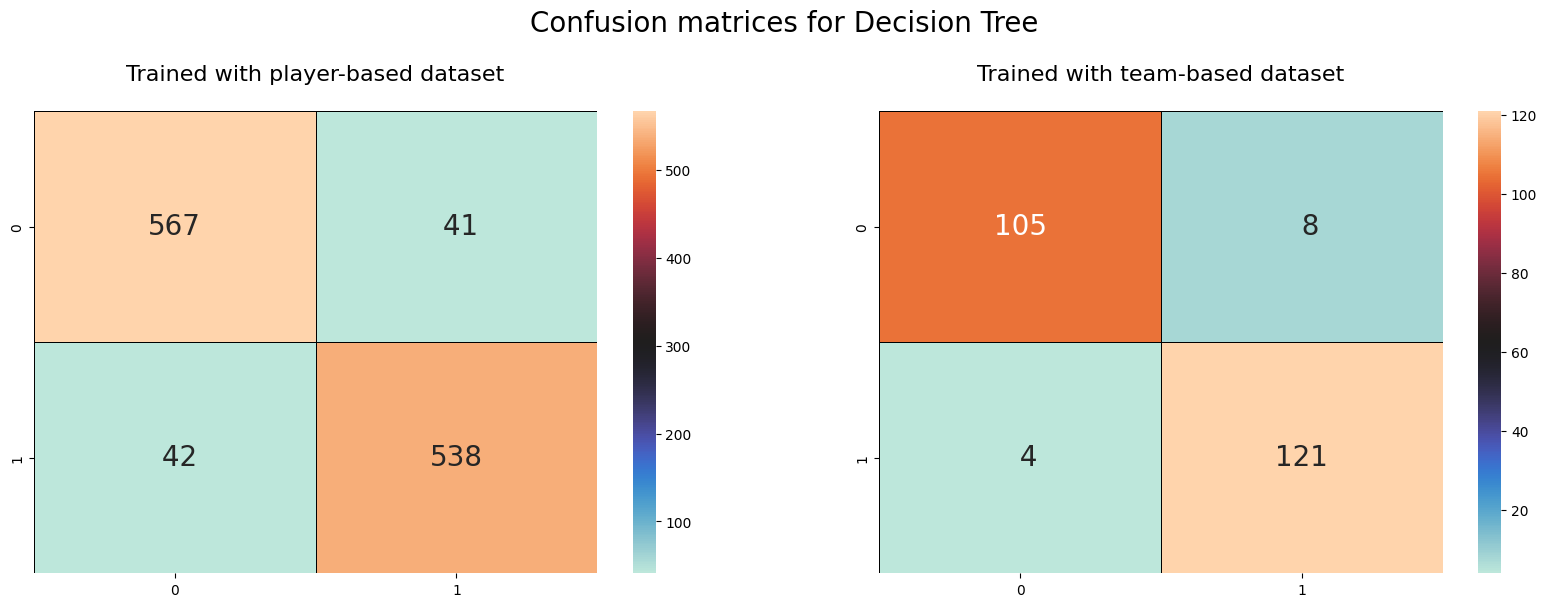

In [671]:
playerBasedDecisionTreeModel = DecisionTreeModel(playerBasedDataX_train, playerBasedDatay_train)
playerBasedDecisionTreeConfusionMatrix = calculateModelConfusionMatrix(playerBasedDecisionTreeModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedDecisionTreeModel = DecisionTreeModel(teamBasedDataX_train, teamBasedDatay_train)
teamBasedDecisionTreeConfusionMatrix = calculateModelConfusionMatrix(teamBasedDecisionTreeModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedDecisionTreeConfusionMatrix, teamBasedDecisionTreeConfusionMatrix, modelsNamesList[2])

In [672]:
playerBasedDecisionTreeModelMetrics = calculateMetricsFromConfusionMatrix(playerBasedDecisionTreeConfusionMatrix, "Player Based Data")
teamBasedDecisionTreeModelMetrics = calculateMetricsFromConfusionMatrix(teamBasedDecisionTreeConfusionMatrix,"Team Based Data")

decisionTreeModelMetrics = pd.concat([playerBasedDecisionTreeModelMetrics, teamBasedDecisionTreeModelMetrics])
decisionTreeModelMetrics


,Precision,Recall,Accuracy,F1-score
Player Based Data,0.931,0.933,0.93,0.932
Team Based Data,0.963,0.929,0.95,0.946


# Random Forest

In [673]:
def RandomForestModel(X_train, y_train):
    randomForest = RandomForestClassifier(n_estimators=100,random_state=1)
    randomForest.fit(X_train, y_train)
    return randomForest

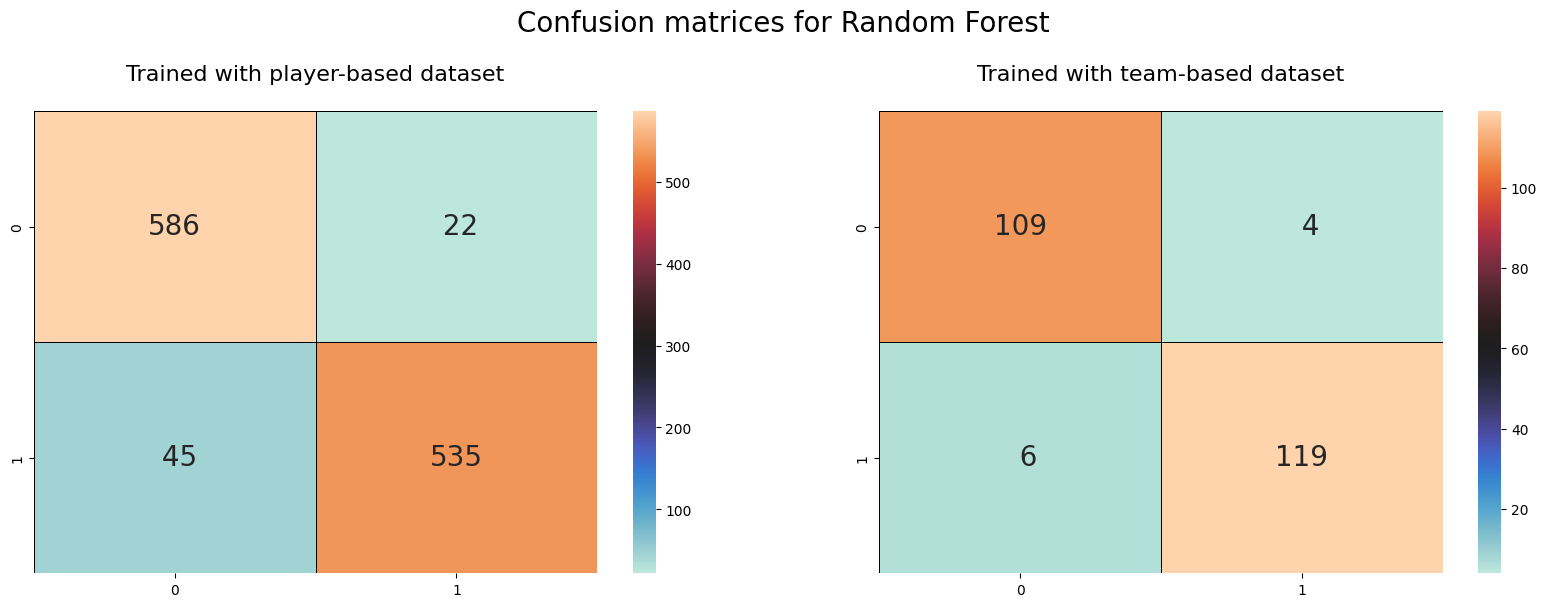

In [674]:
playerBasedRandomForestModel = RandomForestModel(playerBasedDataX_train, playerBasedDatay_train)
playerBasedRandomForestConfusionMatrix = calculateModelConfusionMatrix(playerBasedRandomForestModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedRandomForestModel = RandomForestModel(teamBasedDataX_train, teamBasedDatay_train)
teamBasedRandomForestConfusionMatrix = calculateModelConfusionMatrix(teamBasedRandomForestModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedRandomForestConfusionMatrix, teamBasedRandomForestConfusionMatrix, modelsNamesList[3])

In [675]:
playerBasedRandomForestMetrics = calculateMetricsFromConfusionMatrix(playerBasedRandomForestConfusionMatrix, "Player Based Data")
teamBasedRandomForestMetrics = calculateMetricsFromConfusionMatrix(teamBasedRandomForestConfusionMatrix,"Team Based Data")

randomForestMetrics = pd.concat([playerBasedRandomForestMetrics, teamBasedRandomForestMetrics])
randomForestMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.929,0.964,0.944,0.946
Team Based Data,0.948,0.965,0.958,0.956


# Gradient Boosting

In [676]:
def GradientBoostingModel(X_train, y_train):
    gradientBoosting = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
    gradientBoosting.fit(X_train, y_train)
    return gradientBoosting

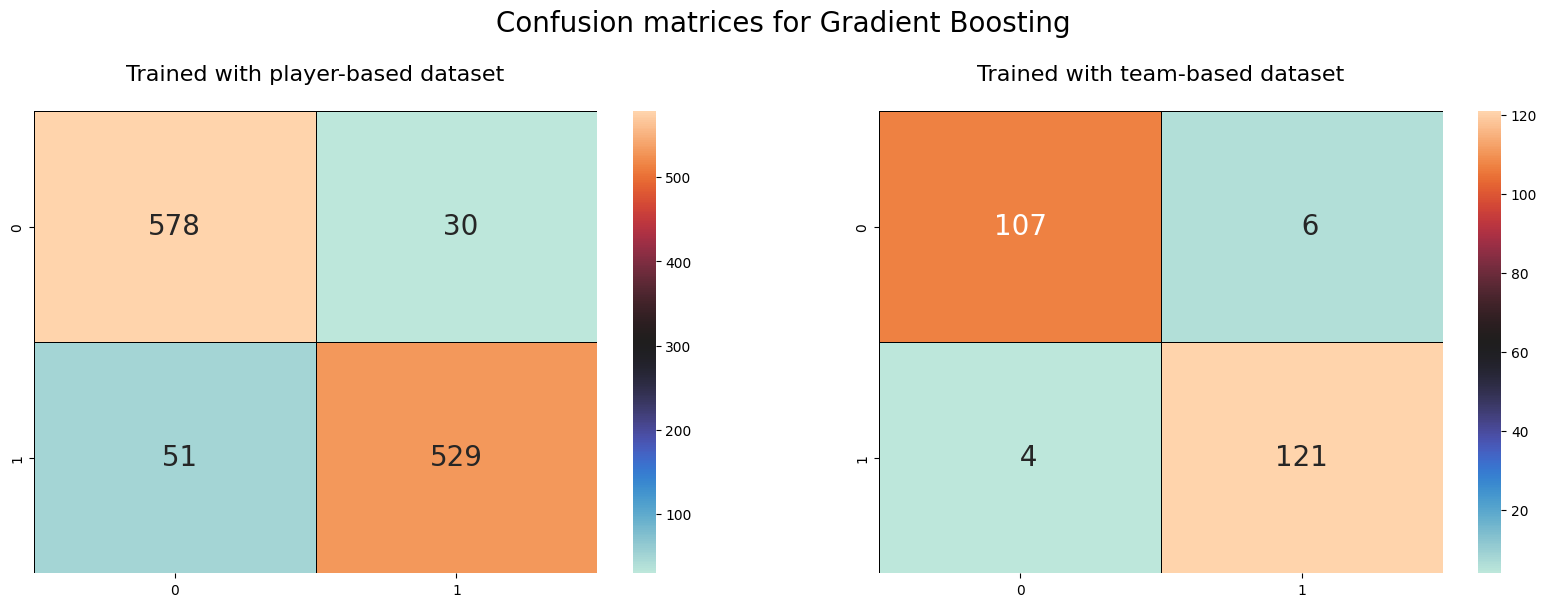

In [677]:
playerBasedGradientBoostingModel = GradientBoostingModel(playerBasedDataX_train, playerBasedDatay_train)
playerBasedGradientBoostingConfusionMatrix = calculateModelConfusionMatrix(playerBasedGradientBoostingModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedGradientBoostingModel = GradientBoostingModel(teamBasedDataX_train, teamBasedDatay_train)
teamBasedGradientBoostingConfusionMatrix = calculateModelConfusionMatrix(teamBasedGradientBoostingModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedGradientBoostingConfusionMatrix, teamBasedGradientBoostingConfusionMatrix, modelsNamesList[4])

In [678]:
playerBasedGradientBoostingModelMetrics = calculateMetricsFromConfusionMatrix(playerBasedGradientBoostingConfusionMatrix, "Player Based Data")
teamBasedGradientBoostingModelMetrics = calculateMetricsFromConfusionMatrix(teamBasedGradientBoostingConfusionMatrix,"Team Based Data")

gradientBoostingModelMetrics = pd.concat([playerBasedGradientBoostingModelMetrics, teamBasedGradientBoostingModelMetrics])
gradientBoostingModelMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.919,0.951,0.932,0.935
Team Based Data,0.964,0.947,0.958,0.955


# AdaBoost

In [679]:
def AdaBoostModel(X_train, y_train):
    adaBoost = AdaBoostClassifier(n_estimators = 600, random_state = 13, learning_rate = 0.1)
    adaBoost.fit(X_train, y_train)
    return adaBoost

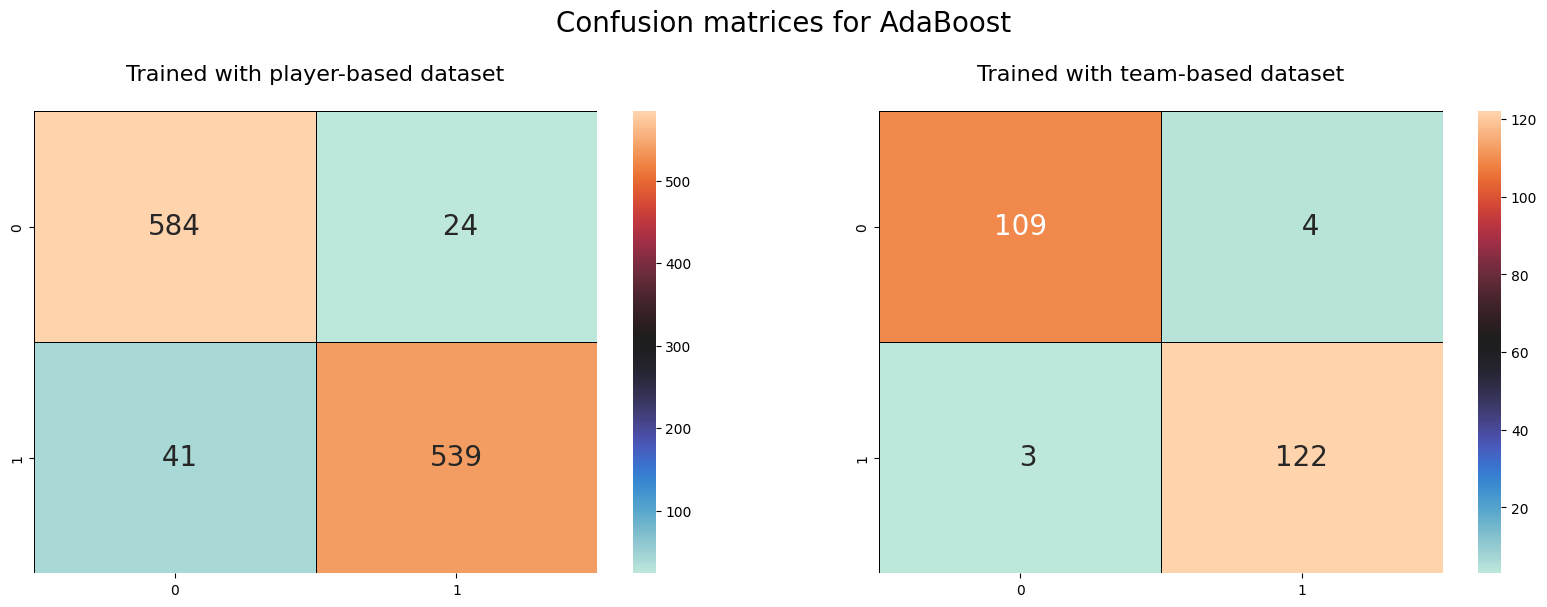

In [680]:
playerBasedAdaBoostModel = AdaBoostModel(playerBasedDataX_train, playerBasedDatay_train)
playerBasedAdaBoostConfusionMatrix = calculateModelConfusionMatrix(playerBasedAdaBoostModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedAdaBoostModel = AdaBoostModel(teamBasedDataX_train, teamBasedDatay_train)
teamBasedAdaBoostConfusionMatrix = calculateModelConfusionMatrix(teamBasedAdaBoostModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedAdaBoostConfusionMatrix, teamBasedAdaBoostConfusionMatrix, modelsNamesList[5])

In [681]:
playerBasedAdaBoostModelMetrics = calculateMetricsFromConfusionMatrix(playerBasedAdaBoostConfusionMatrix, "Player Based Data")
teamBasedAdaBoostModelMetrics = calculateMetricsFromConfusionMatrix(teamBasedAdaBoostConfusionMatrix,"Team Based Data")

adaBoostMetrics = pd.concat([playerBasedAdaBoostModelMetrics, teamBasedAdaBoostModelMetrics])
adaBoostMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.934,0.961,0.945,0.947
Team Based Data,0.973,0.965,0.971,0.969


# LightGBM

In [682]:
def LightGBM(X_train, y_train):
    lightGBM = lightgbm.LGBMClassifier(learning_rate = 0.01, n_estimators = 600, random_state = 13, max_depth = 40)
    lightGBM.fit(X_train, y_train)
    return lightGBM

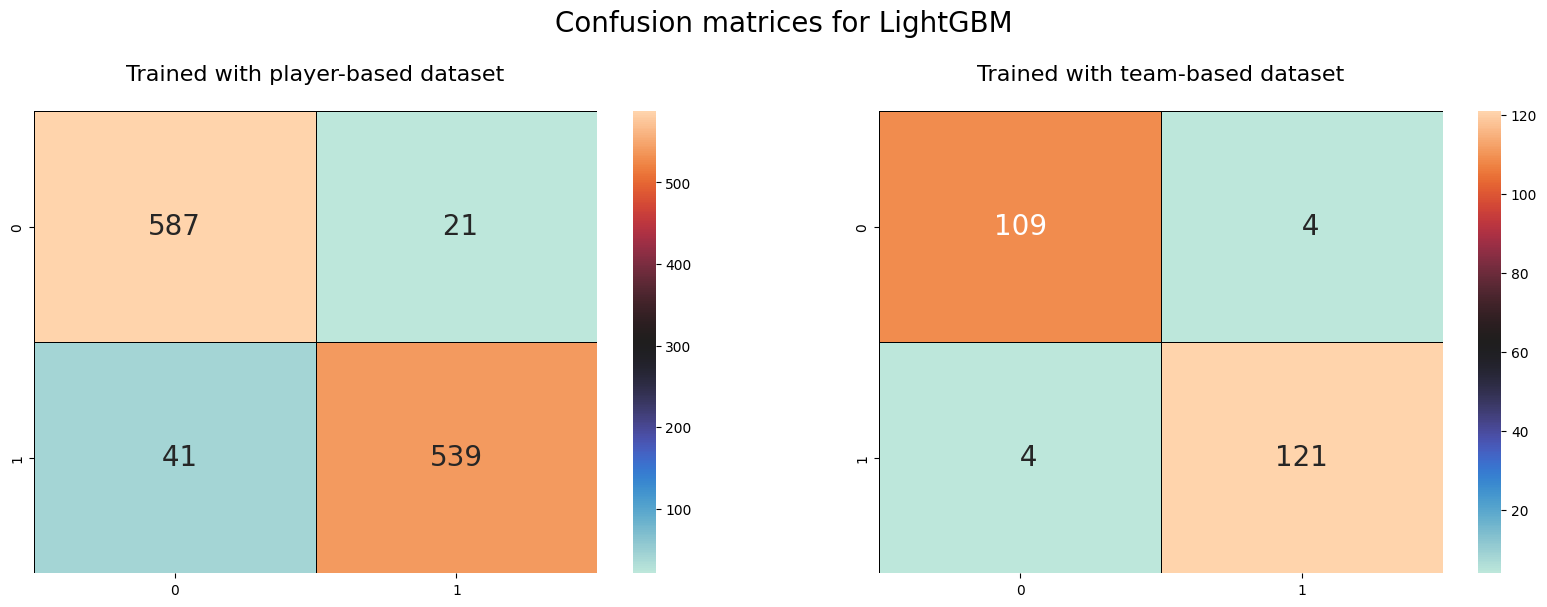

In [683]:
playerBasedLightGBMModel = LightGBM(playerBasedDataX_train, playerBasedDatay_train)
playerBasedLightGBMConfusionMatrix = calculateModelConfusionMatrix(playerBasedLightGBMModel, playerBasedDataX_test, playerBasedDatay_test)

teamBasedLightGBMModel = LightGBM(teamBasedDataX_train, teamBasedDatay_train)
teamBasedLightGBMConfusionMatrix = calculateModelConfusionMatrix(teamBasedLightGBMModel, teamBasedDataX_test, teamBasedDatay_test)

plotConfusionMatrices(playerBasedLightGBMConfusionMatrix, teamBasedLightGBMConfusionMatrix, modelsNamesList[6])

In [684]:
playerBasedLightGBMMetrics = calculateMetricsFromConfusionMatrix(playerBasedLightGBMConfusionMatrix, "Player Based Data")
teamBasedLightGBMMetrics = calculateMetricsFromConfusionMatrix(teamBasedLightGBMConfusionMatrix,"Team Based Data")

lightGBMMetrics = pd.concat([playerBasedLightGBMMetrics, teamBasedLightGBMMetrics])
lightGBMMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.935,0.965,0.948,0.950
Team Based Data,0.965,0.965,0.966,0.965


# Comparison of Models

In [685]:
playerBasedMetrics = pd.concat([playerBasedLogisticRegressionMetrics, playerBasedNaiveBayesClassifierMetrics, playerBasedDecisionTreeModelMetrics, playerBasedRandomForestMetrics, playerBasedGradientBoostingModelMetrics, playerBasedAdaBoostModelMetrics, playerBasedLightGBMMetrics])
playerBasedMetrics = playerBasedMetrics.set_index([modelsNamesList]).sort_index()
playerBasedMetrics

,Precision,Recall,Accuracy,F1-score
AdaBoost,0.934,0.961,0.945,0.947
Decision Tree,0.931,0.933,0.930,0.932
Gradient Boosting,0.919,0.951,0.932,0.935
LightGBM,0.935,0.965,0.948,0.950
Logistic Regression,0.929,0.944,0.934,0.936
Naive Bayes Classifier,0.758,0.896,0.801,0.821
Random Forest,0.929,0.964,0.944,0.946


In [686]:
teamBasedMetrics = pd.concat([teamBasedLogisticRegressionMetrics, teamBasedNaiveBayesClassifierMetrics, teamBasedDecisionTreeModelMetrics, teamBasedRandomForestMetrics, teamBasedGradientBoostingModelMetrics, teamBasedAdaBoostModelMetrics, teamBasedLightGBMMetrics])
teamBasedMetrics = teamBasedMetrics.set_index([modelsNamesList]).sort_index()
teamBasedMetrics

,Precision,Recall,Accuracy,F1-score
AdaBoost,0.973,0.965,0.971,0.969
Decision Tree,0.963,0.929,0.950,0.946
Gradient Boosting,0.964,0.947,0.958,0.955
LightGBM,0.965,0.965,0.966,0.965
Logistic Regression,0.948,0.973,0.962,0.960
Naive Bayes Classifier,0.846,0.876,0.866,0.861
Random Forest,0.948,0.965,0.958,0.956


# Feature Selection

In [687]:
def featureSelection(modelName, N):
    selectedFeatures = np.argsort(modelName.feature_importances_)[::-1][:N]
    return selectedFeatures

In [688]:
def plotSelectedFeatures(modelName, selectedFeatures):
    plt.figure(figsize = (10, 6))
    plt.title(str(len(selectedFeatures)) + " most important features according to " + modelsNamesList[5], y = 1.05, size = 20)
    plt.bar(range(len(selectedFeatures)), modelName.feature_importances_[selectedFeatures], color="blue", align="center")
    plt.xticks(range(len(selectedFeatures)), featuresNamesList[selectedFeatures], rotation=80)
    plt.show()

In [689]:
def plotCorrelationMatrix(correleationMatrix): 
    plt.figure(figsize=(10,10))
    sns.heatmap(correleationMatrix,linewidths=0.6,fmt=".2f",annot=True,cmap="icefire")
    plt.show()

In [690]:
def listForDropHighlyCorrelatedFeatures(matrix, threshHold):
    upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))
    toDrop = [column for column in upper.columns if any(upper[column] > threshHold)]
    return toDrop

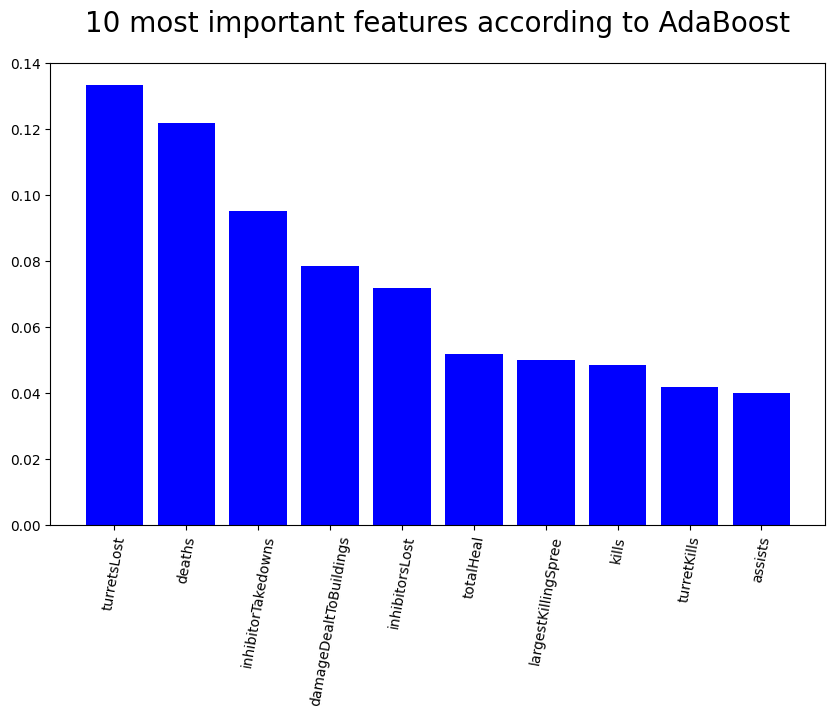

In [691]:
selectedFeatures = featureSelection(teamBasedAdaBoostModel, 10)
selectedFeaturesNamesList = teamBasedData_X.columns[selectedFeatures]
plotSelectedFeatures(teamBasedAdaBoostModel, selectedFeatures)

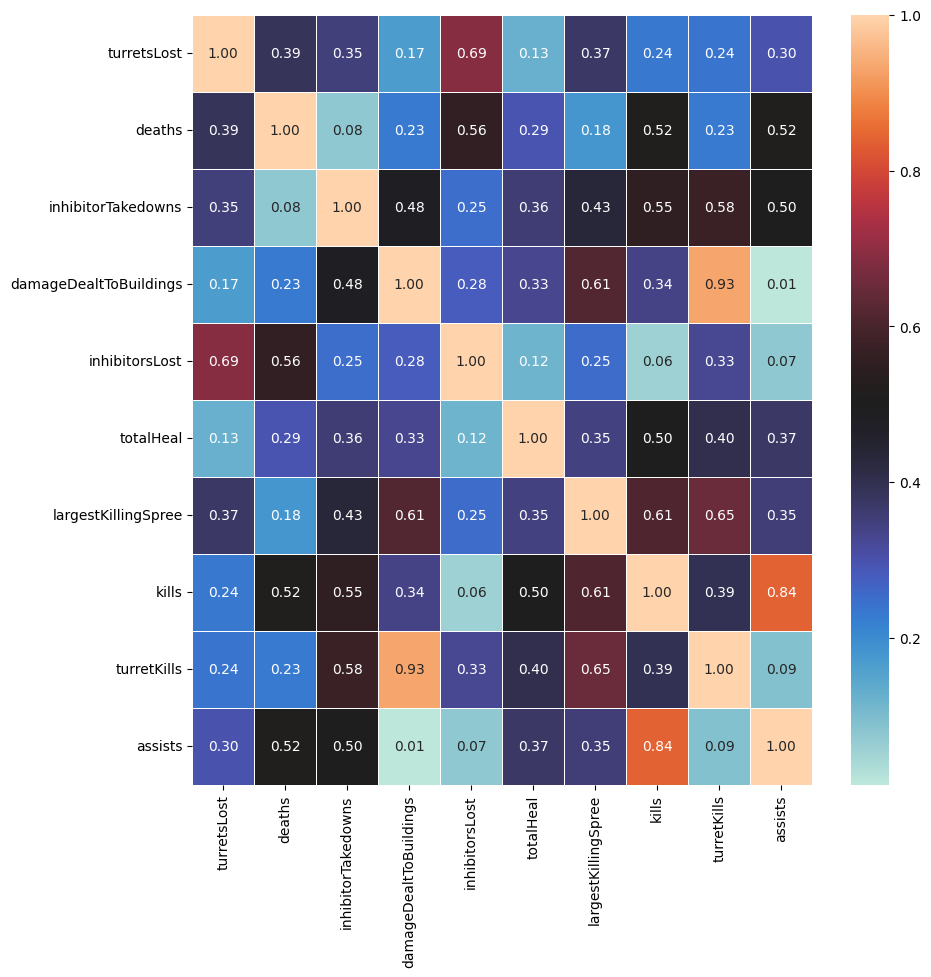

In [692]:
correlationMatrix = teamBasedData_X[selectedFeaturesNamesList].corr().abs()
plotCorrelationMatrix(correlationMatrix)

In [693]:
highlyCorrolatedFeatures = listForDropHighlyCorrelatedFeatures(correlationMatrix, 0.65)
experimentalFeaturesNamesList = selectedFeaturesNamesList.difference(highlyCorrolatedFeatures)

In [714]:
highlyCorrolatedFeatures

['inhibitorsLost', 'turretKills', 'assists']

In [694]:
selectedPlayerBasedData_X = playerBasedData_X[experimentalFeaturesNamesList]
selectedTeamBasedData_X = teamBasedData_X[experimentalFeaturesNamesList]

In [695]:
selectedPlayerBasedDataX_train, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_train, selectedPlayerBasedDatay_test = prepareData(selectedPlayerBasedData_X, playerBasedData_y)
selectedTeamBasedDataX_train, selectedTeamBasedDataX_test, selectedTeamBasedDatay_train, selectedTeamBasedDatay_test = prepareData(selectedTeamBasedData_X, teamBasedData_y)

# Logistic Regression with Selected Features

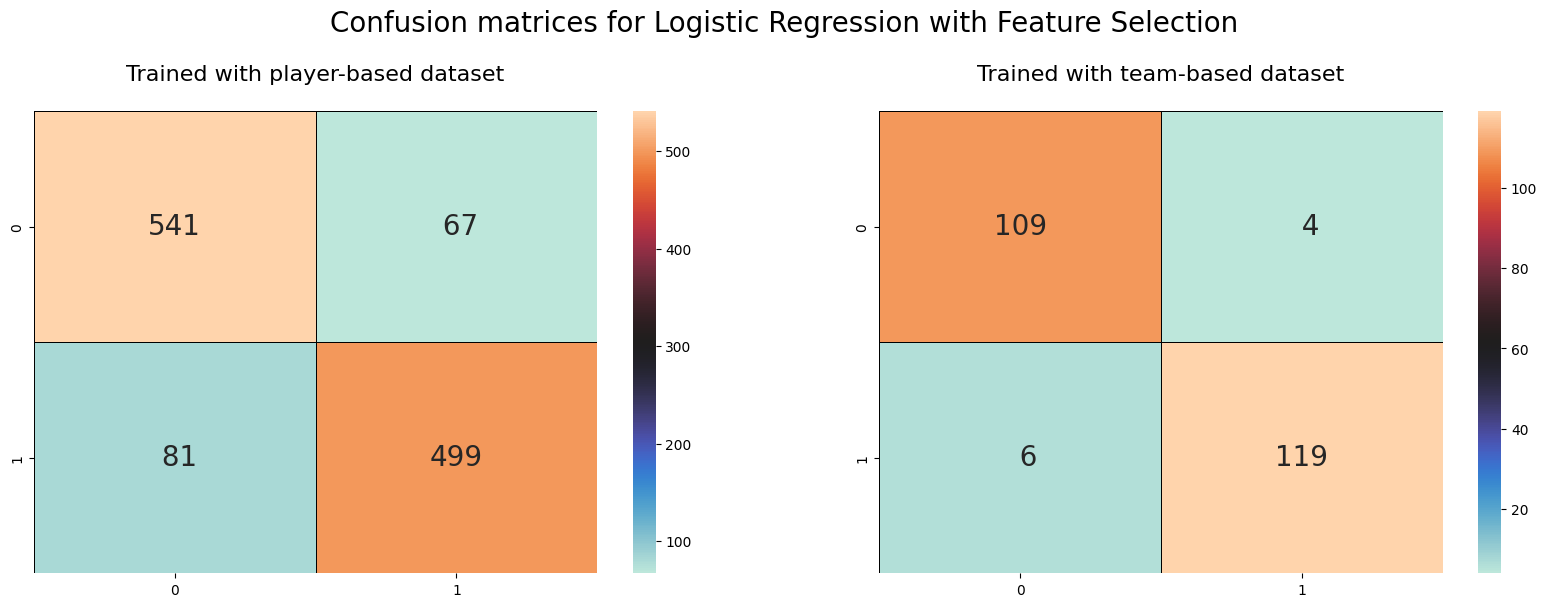

In [696]:
playerBasedLogisticRegressionModelWithFS = LogisticRegressionModel(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedLogisticRegressionConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedLogisticRegressionModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedLogisticRegressionModelWithFS = LogisticRegressionModel(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedLogisticRegressionConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedLogisticRegressionModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedLogisticRegressionConfusionMatrixWithFS, teamBasedLogisticRegressionConfusionMatrixWithFS, modelsNamesList[0] + " with Feature Selection")

In [697]:
playerBasedLogisticRegressionMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedLogisticRegressionConfusionMatrixWithFS, "Player Based Data with Feature Selection" )
teamBasedLogisticRegressionMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedLogisticRegressionConfusionMatrixWithFS,"Team Based Data with Feature Selection")

logisticRegressionModelMetricsWithFS = pd.concat([playerBasedLogisticRegressionMetricsWithFS, teamBasedLogisticRegressionMetricsWithFS])
overAllLogisticRegressionMetrics = pd.concat([logisticRegressionModelMetrics, logisticRegressionModelMetricsWithFS])

overAllLogisticRegressionMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.929,0.944,0.934,0.936
Team Based Data,0.948,0.973,0.962,0.960
Player Based Data with Feature Selection,0.870,0.890,0.875,0.880
Team Based Data with Feature Selection,0.948,0.965,0.958,0.956


# Naive Bayes Classifier with Selected Features

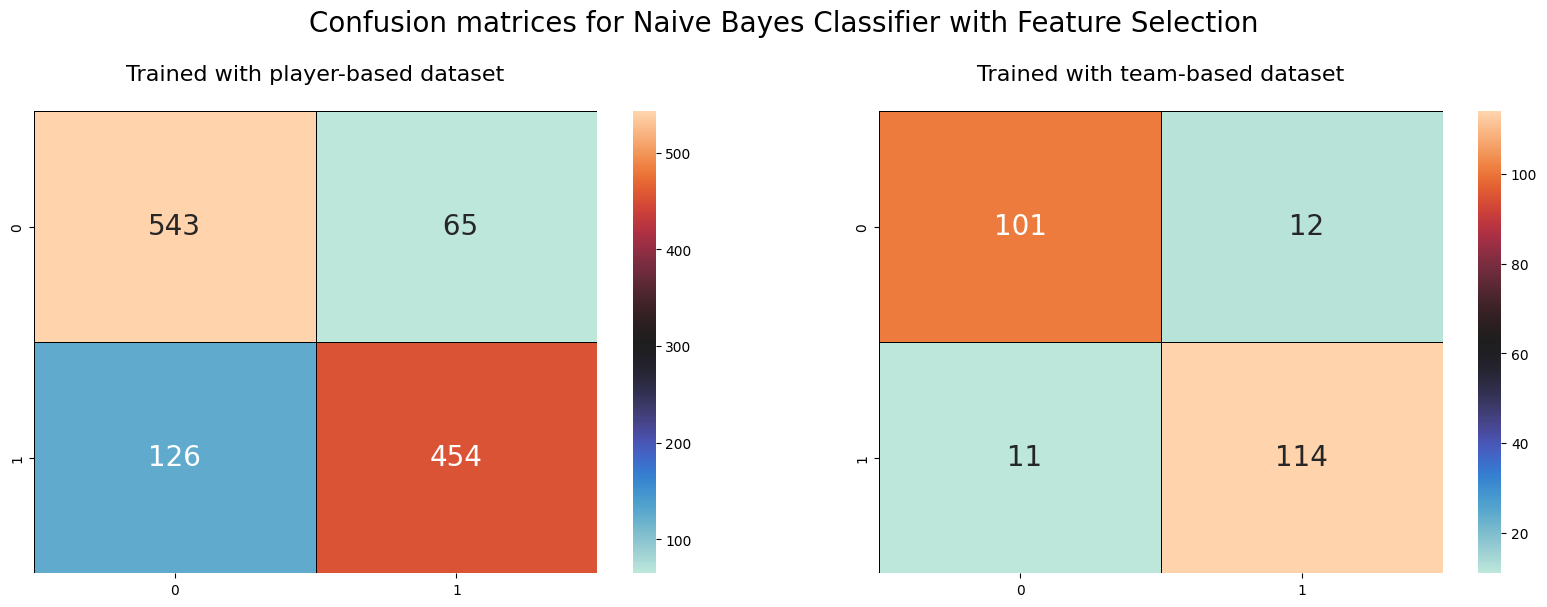

In [698]:
playerBasedNaiveBayesClassifierModelWithFS = NaiveBayesClassifier(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedNaiveBayesClassifierConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedNaiveBayesClassifierModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedNaiveBayesClassifierModelWithFS = NaiveBayesClassifier(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedNaiveBayesClassifierConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedNaiveBayesClassifierModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedNaiveBayesClassifierConfusionMatrixWithFS, teamBasedNaiveBayesClassifierConfusionMatrixWithFS, modelsNamesList[1] + " with Feature Selection")

In [699]:
playerBasedNaiveBayesClassifierMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedNaiveBayesClassifierConfusionMatrixWithFS, "Player Based Data with Feature Selection")
teamBasedNaiveBayesClassifierMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedNaiveBayesClassifierConfusionMatrixWithFS,"Team Based Data with Feature Selection")

naiveBayesClassifierMetricsWithFS = pd.concat([playerBasedNaiveBayesClassifierMetricsWithFS, teamBasedNaiveBayesClassifierMetricsWithFS])
overAllNaiveBayesClassifierMetrics = pd.concat([naiveBayesClassifierMetrics, naiveBayesClassifierMetricsWithFS])
overAllNaiveBayesClassifierMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.758,0.896,0.801,0.821
Team Based Data,0.846,0.876,0.866,0.861
Player Based Data with Feature Selection,0.812,0.893,0.839,0.851
Team Based Data with Feature Selection,0.902,0.894,0.903,0.898


# Decision Tree with Feature Selection

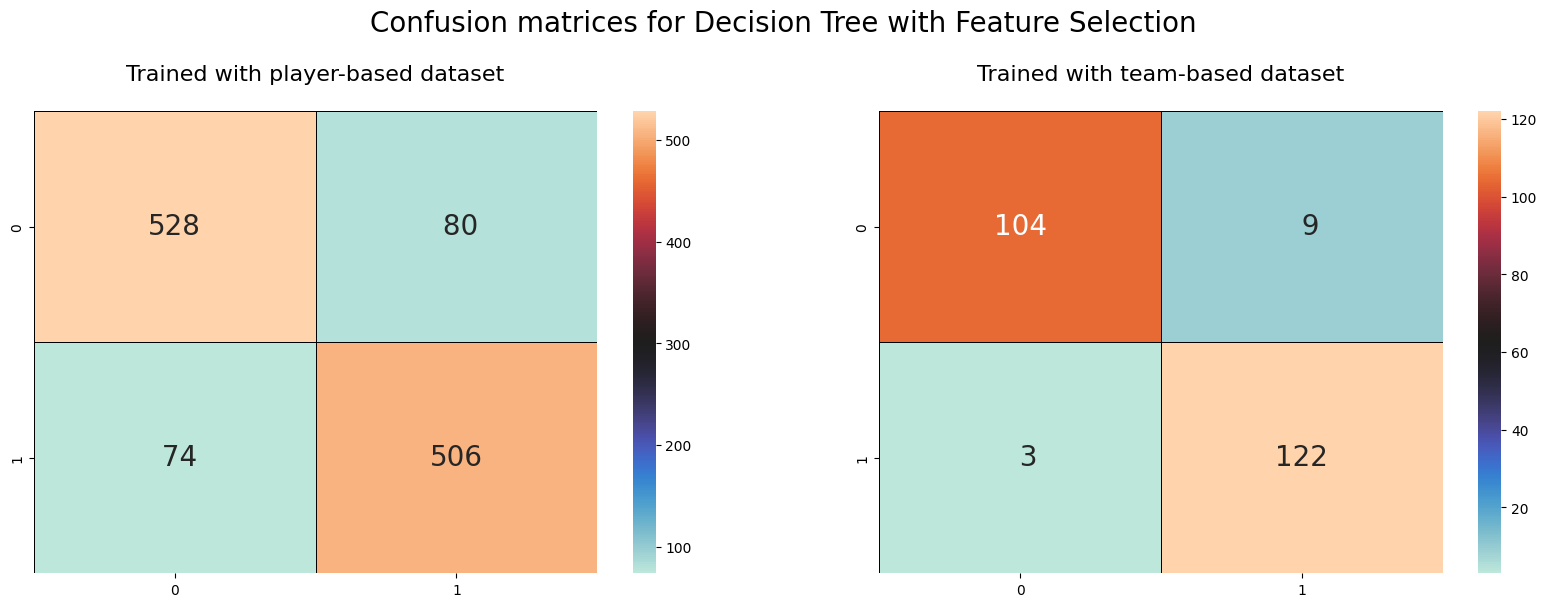

In [700]:
playerBasedDecisionTreeModelWithFS = DecisionTreeModel(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedDecisionTreeConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedDecisionTreeModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedDecisionTreeModelWithFS = DecisionTreeModel(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedDecisionTreeConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedDecisionTreeModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedDecisionTreeConfusionMatrixWithFS, teamBasedDecisionTreeConfusionMatrixWithFS, modelsNamesList[2] + " with Feature Selection")

In [701]:
playerBasedDecisionTreeModelMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedDecisionTreeConfusionMatrixWithFS, "Player Based Data with Feature Selection")
teamBasedDecisionTreeModelMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedDecisionTreeConfusionMatrixWithFS,"Team Based Data with Feature Selection")

decisionTreeModelMetricsWithFS = pd.concat([playerBasedDecisionTreeModelMetricsWithFS, teamBasedDecisionTreeModelMetricsWithFS])
overAllDecisionTreeModelMetrics = pd.concat([decisionTreeModelMetrics, decisionTreeModelMetricsWithFS])
overAllDecisionTreeModelMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.931,0.933,0.93,0.932
Team Based Data,0.963,0.929,0.95,0.946
Player Based Data with Feature Selection,0.877,0.868,0.87,0.872
Team Based Data with Feature Selection,0.972,0.920,0.95,0.945


# Random Forest with Feature Selection

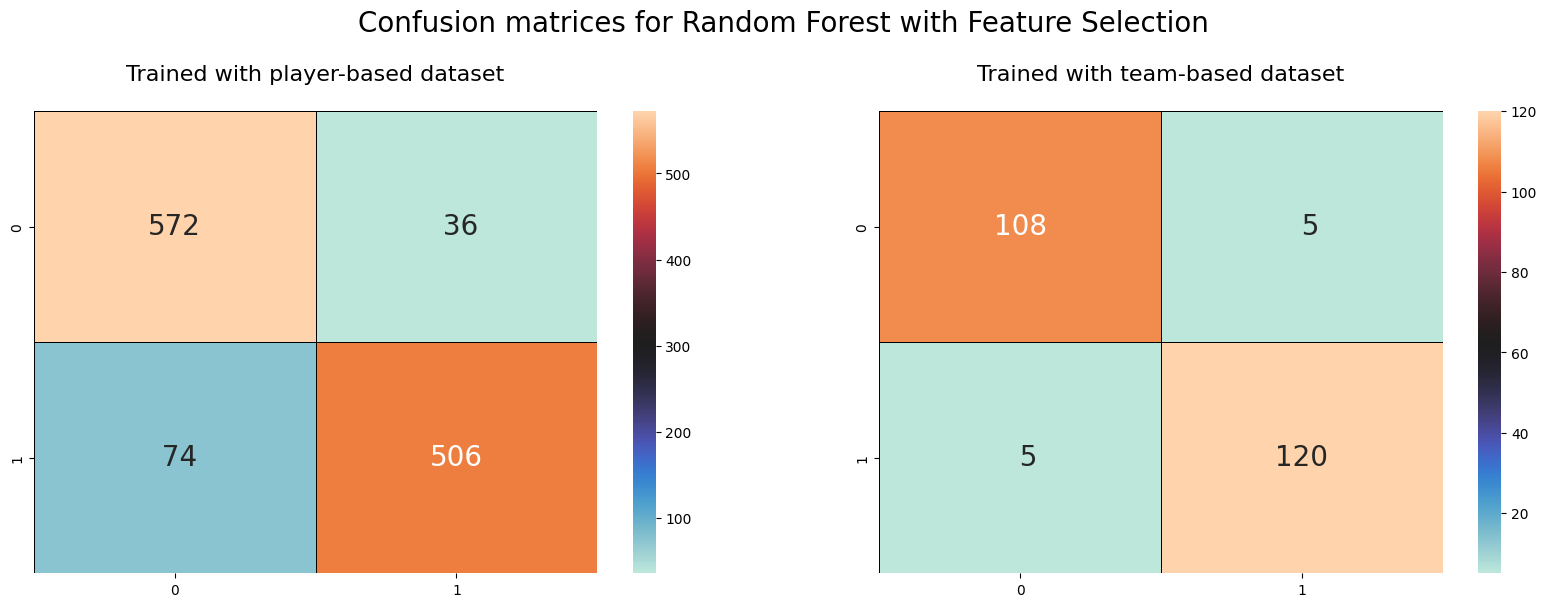

In [702]:
playerBasedRandomForestModelWithFS = RandomForestModel(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedRandomForestConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedRandomForestModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedRandomForestModelWithFS = RandomForestModel(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedRandomForestConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedRandomForestModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedRandomForestConfusionMatrixWithFS, teamBasedRandomForestConfusionMatrixWithFS, modelsNamesList[3] + " with Feature Selection")

In [703]:
playerBasedRandomForestMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedRandomForestConfusionMatrixWithFS, "Player Based Data with Feature Selection")
teamBasedRandomForestMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedRandomForestConfusionMatrixWithFS,"Team Based Data with Feature Selection")

randomForestMetricsWithFS = pd.concat([playerBasedRandomForestMetricsWithFS, teamBasedRandomForestMetricsWithFS])
overAllRandomForestMetrics = pd.concat([randomForestMetrics, randomForestMetricsWithFS])
overAllRandomForestMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.929,0.964,0.944,0.946
Team Based Data,0.948,0.965,0.958,0.956
Player Based Data with Feature Selection,0.885,0.941,0.907,0.912
Team Based Data with Feature Selection,0.956,0.956,0.958,0.956


# Gradient Boosting with Feature Selection

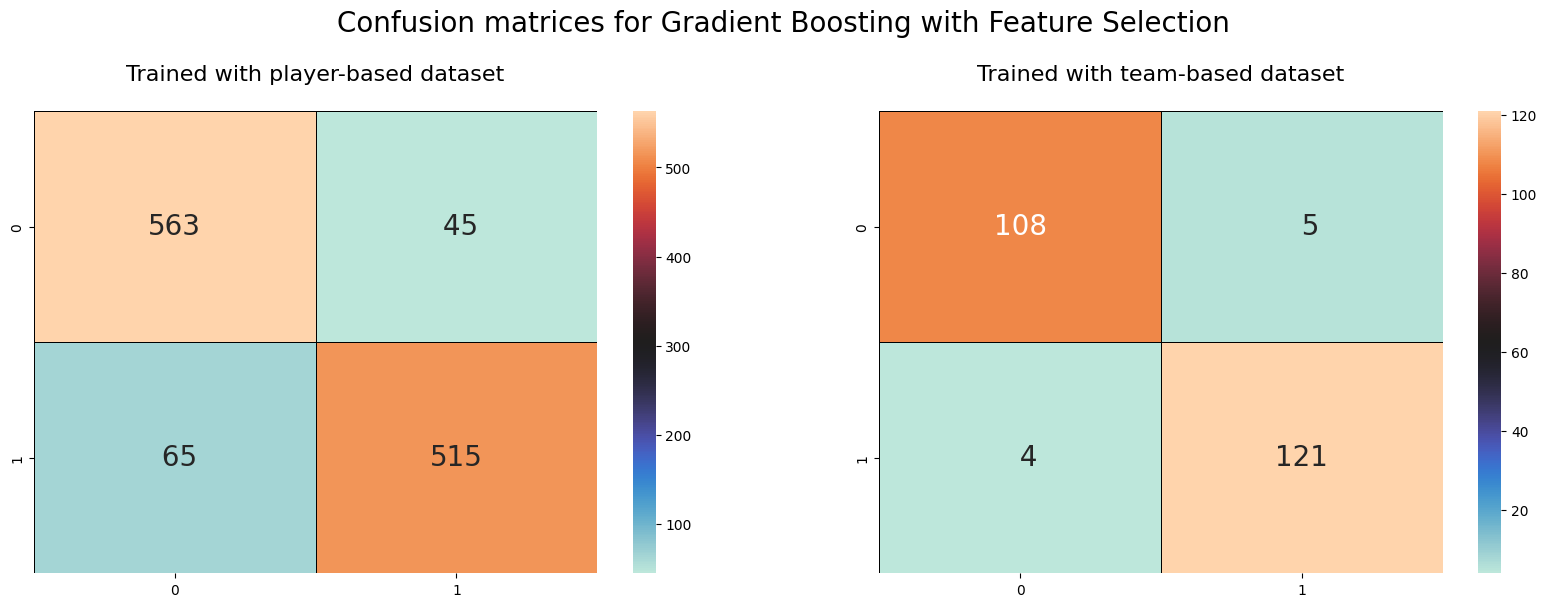

In [704]:
playerBasedGradientBoostingModelWithFS = GradientBoostingModel(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedGradientBoostingConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedGradientBoostingModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedGradientBoostingModelWithFS = GradientBoostingModel(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedGradientBoostingConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedGradientBoostingModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedGradientBoostingConfusionMatrixWithFS, teamBasedGradientBoostingConfusionMatrixWithFS, modelsNamesList[4] + " with Feature Selection")

In [705]:
playerBasedGradientBoostingModelMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedGradientBoostingConfusionMatrixWithFS, "Player Based Data with Feature Selection")
teamBasedGradientBoostingModelMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedGradientBoostingConfusionMatrixWithFS,"Team Based Data with Feature Selection")

gradientBoostingModelMetricsWithFS = pd.concat([playerBasedGradientBoostingModelMetricsWithFS, teamBasedGradientBoostingModelMetricsWithFS])
overAllGradientBoostingModelMetrics = pd.concat([gradientBoostingModelMetrics,gradientBoostingModelMetricsWithFS])
overAllGradientBoostingModelMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.919,0.951,0.932,0.935
Team Based Data,0.964,0.947,0.958,0.955
Player Based Data with Feature Selection,0.896,0.926,0.907,0.911
Team Based Data with Feature Selection,0.964,0.956,0.962,0.960


# AdaBoost with Feature Selection

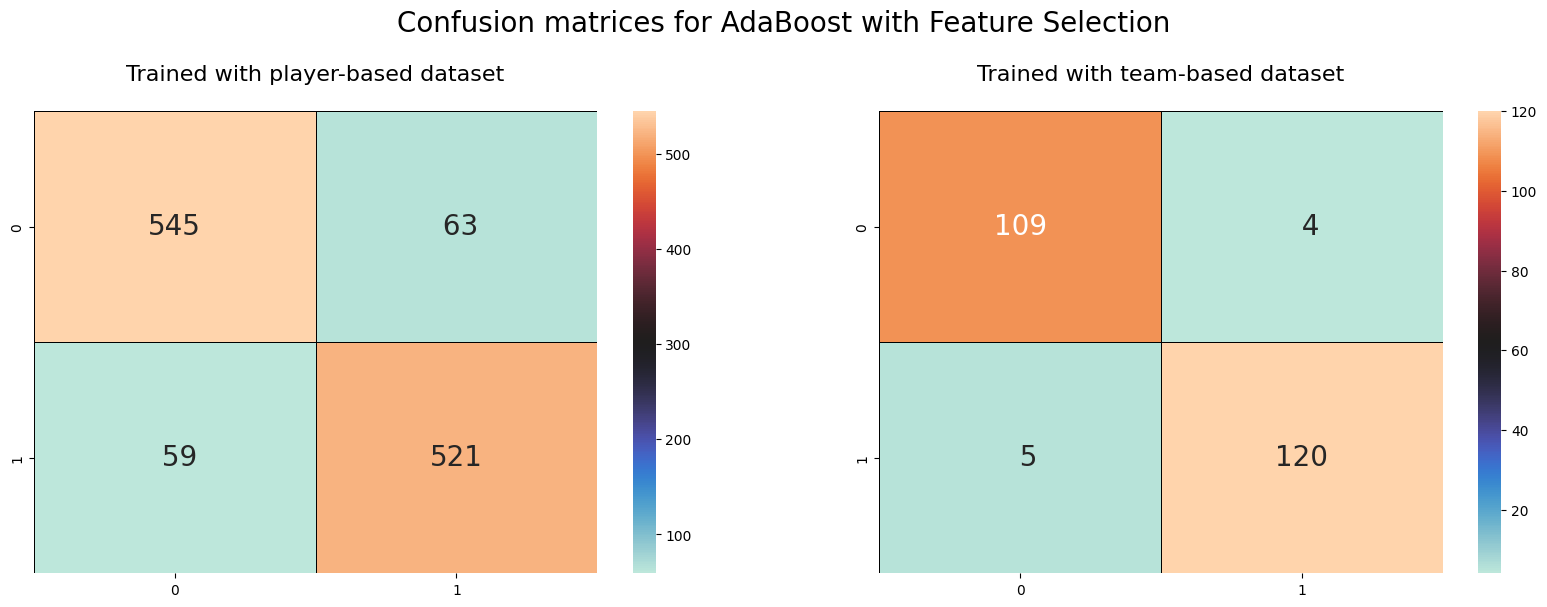

In [706]:
playerBasedAdaBoostModelWithFS = AdaBoostModel(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedAdaBoostConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedAdaBoostModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedAdaBoostModelWithFS = AdaBoostModel(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedAdaBoostConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedAdaBoostModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedAdaBoostConfusionMatrixWithFS, teamBasedAdaBoostConfusionMatrixWithFS, modelsNamesList[5] + " with Feature Selection")

In [707]:
playerBasedAdaBoostModelMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedAdaBoostConfusionMatrixWithFS, "Player Based Data with Feature Selection")
teamBasedAdaBoostModelMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedAdaBoostConfusionMatrixWithFS,"Team Based Data with Feature Selection")

adaBoostMetricsWithFS = pd.concat([playerBasedAdaBoostModelMetricsWithFS, teamBasedAdaBoostModelMetricsWithFS])
overAllAdaBoostMetrics = pd.concat([adaBoostMetrics, adaBoostMetricsWithFS])
overAllAdaBoostMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.934,0.961,0.945,0.947
Team Based Data,0.973,0.965,0.971,0.969
Player Based Data with Feature Selection,0.902,0.896,0.897,0.899
Team Based Data with Feature Selection,0.956,0.965,0.962,0.960


# LightGBM with Feature Selection

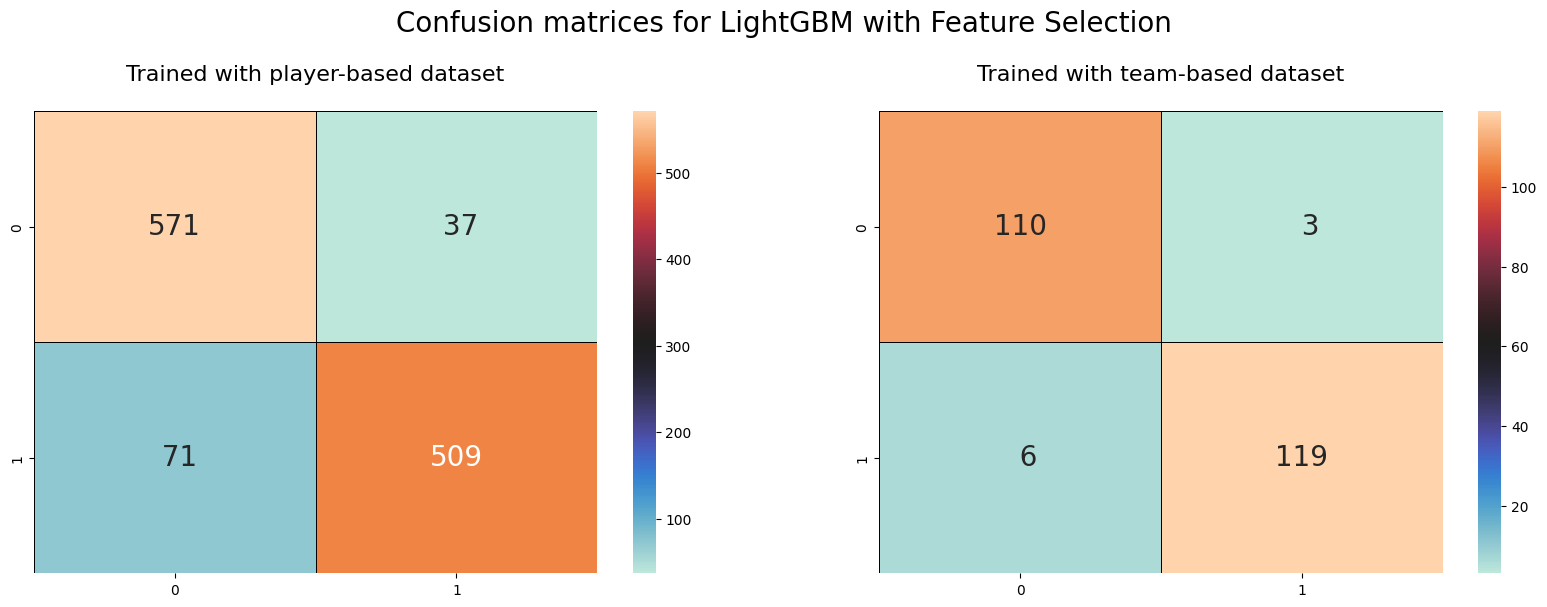

In [708]:
playerBasedLightGBMModelWithFS = LightGBM(selectedPlayerBasedDataX_train, selectedPlayerBasedDatay_train)
playerBasedLightGBMConfusionMatrixWithFS = calculateModelConfusionMatrix(playerBasedLightGBMModelWithFS, selectedPlayerBasedDataX_test, selectedPlayerBasedDatay_test)

teamBasedLightGBMModelWithFS = LightGBM(selectedTeamBasedDataX_train, selectedTeamBasedDatay_train)
teamBasedLightGBMConfusionMatrixWithFS = calculateModelConfusionMatrix(teamBasedLightGBMModelWithFS, selectedTeamBasedDataX_test, selectedTeamBasedDatay_test)

plotConfusionMatrices(playerBasedLightGBMConfusionMatrixWithFS, teamBasedLightGBMConfusionMatrixWithFS, modelsNamesList[6] + " with Feature Selection")

In [709]:
playerBasedLightGBMMetricsWithFS = calculateMetricsFromConfusionMatrix(playerBasedLightGBMConfusionMatrix, "Player Based Data with Feature Selection")
teamBasedLightGBMMetricsWithFS = calculateMetricsFromConfusionMatrix(teamBasedLightGBMConfusionMatrix,"Team Based Data with Feature Selection")

lightGBMMetricsWithFS = pd.concat([playerBasedLightGBMMetricsWithFS, teamBasedLightGBMMetricsWithFS])
overAllLightGBMMetrics = pd.concat([lightGBMMetrics, lightGBMMetricsWithFS])
overAllLightGBMMetrics

,Precision,Recall,Accuracy,F1-score
Player Based Data,0.935,0.965,0.948,0.950
Team Based Data,0.965,0.965,0.966,0.965
Player Based Data with Feature Selection,0.935,0.965,0.948,0.950
Team Based Data with Feature Selection,0.965,0.965,0.966,0.965


# Comparison of Models as Before Feature Selection and After Feature Selection

In [710]:
modelsNamesListWithFS = [i + " with Feature Selection" for i in modelsNamesList] 

In [711]:
playerBasedMetricsWithFS = pd.concat([playerBasedLogisticRegressionMetricsWithFS, playerBasedNaiveBayesClassifierMetricsWithFS, playerBasedDecisionTreeModelMetricsWithFS, playerBasedRandomForestMetricsWithFS, playerBasedGradientBoostingModelMetricsWithFS, playerBasedAdaBoostModelMetricsWithFS, playerBasedLightGBMMetricsWithFS])
playerBasedMetricsWithFS = playerBasedMetricsWithFS.set_index([modelsNamesListWithFS])
overAllPlayerBasedMetrics = pd.concat([playerBasedMetrics, playerBasedMetricsWithFS]).sort_index()
overAllPlayerBasedMetrics

,Precision,Recall,Accuracy,F1-score
AdaBoost,0.934,0.961,0.945,0.947
AdaBoost with Feature Selection,0.902,0.896,0.897,0.899
Decision Tree,0.931,0.933,0.930,0.932
Decision Tree with Feature Selection,0.877,0.868,0.870,0.872
Gradient Boosting,0.919,0.951,0.932,0.935
Gradient Boosting with Feature Selection,0.896,0.926,0.907,0.911
LightGBM,0.935,0.965,0.948,0.950
LightGBM with Feature Selection,0.935,0.965,0.948,0.950
Logistic Regression,0.929,0.944,0.934,0.936
Logistic Regression with Feature Selection,0.870,0.890,0.875,0.880


In [712]:
teamBasedMetricsWithFS = pd.concat([teamBasedLogisticRegressionMetricsWithFS, teamBasedNaiveBayesClassifierMetricsWithFS, teamBasedDecisionTreeModelMetricsWithFS, teamBasedRandomForestMetricsWithFS, teamBasedGradientBoostingModelMetricsWithFS, teamBasedAdaBoostModelMetricsWithFS, teamBasedLightGBMMetricsWithFS])
teamBasedMetricsWithFS = teamBasedMetricsWithFS.set_index([modelsNamesListWithFS])
overAllTeamBasedMetrics = pd.concat([teamBasedMetrics, teamBasedMetricsWithFS]).sort_index()
overAllTeamBasedMetrics

,Precision,Recall,Accuracy,F1-score
AdaBoost,0.973,0.965,0.971,0.969
AdaBoost with Feature Selection,0.956,0.965,0.962,0.960
Decision Tree,0.963,0.929,0.950,0.946
Decision Tree with Feature Selection,0.972,0.920,0.950,0.945
Gradient Boosting,0.964,0.947,0.958,0.955
Gradient Boosting with Feature Selection,0.964,0.956,0.962,0.960
LightGBM,0.965,0.965,0.966,0.965
LightGBM with Feature Selection,0.965,0.965,0.966,0.965
Logistic Regression,0.948,0.973,0.962,0.960
Logistic Regression with Feature Selection,0.948,0.965,0.958,0.956
